In [1]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
from pandas_profiling import ProfileReport 
%config InlineBackend.figure_format = 'retina' 
from scipy.stats import iqr as IQR
from collections import Counter
import scipy.stats as stat
from sklearn.neighbors import NearestNeighbors

# Setting seaborn style
sns.set()

Collect initial data

In [2]:
#import file csv
df = pd.read_csv('H2.csv',sep=",")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Describe, explore and assess data quality

In [4]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [5]:
df.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07
79329,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [7]:
df.replace("", np.nan, inplace=True)

In [8]:
# Summary statistics for all variables
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [22]:
prof = ProfileReport(df)
prof.to_file(output_file='H2_Profile.html')

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

C:\Users\DF010760\Anaconda3\envs\Deep_Learning\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#FUNCTION TO SHOW MISSING VALUES AND THEIR PERCENTAGES
def missing_data(df):
    l = []
    for col in df.columns:
        missing = df[col].isnull().sum(axis=0)
        percentage = missing/df.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

In [10]:
df_missing = missing_data(df)
df_missing = df_missing[df_missing['missing']>0]
df_missing

,Feature,missing,percentage
12,Country,24,0.030253
9,Children,4,0.005042


In [11]:
# Drop rows with missing values (28 rows, representing 0.035% of the dataset)
df1 = df.dropna() 

In [12]:
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [20]:
# Check duplicated observations
df1.loc[df.duplicated(keep=False), :]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
8,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
10,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
12,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79312,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42,NULL,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [15]:
non_metric_features = ['IsCanceled','ArrivalDateMonth','Children','Babies','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','DepositType','Company','CustomerType','ADR','ReservationStatus','ReservationStatusDate']
metric_features = df1.columns.drop(non_metric_features).to_list()

In [16]:
metric_features

['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'Agent',
 'DaysInWaitingList',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

# Visualization/Correlations

C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anac

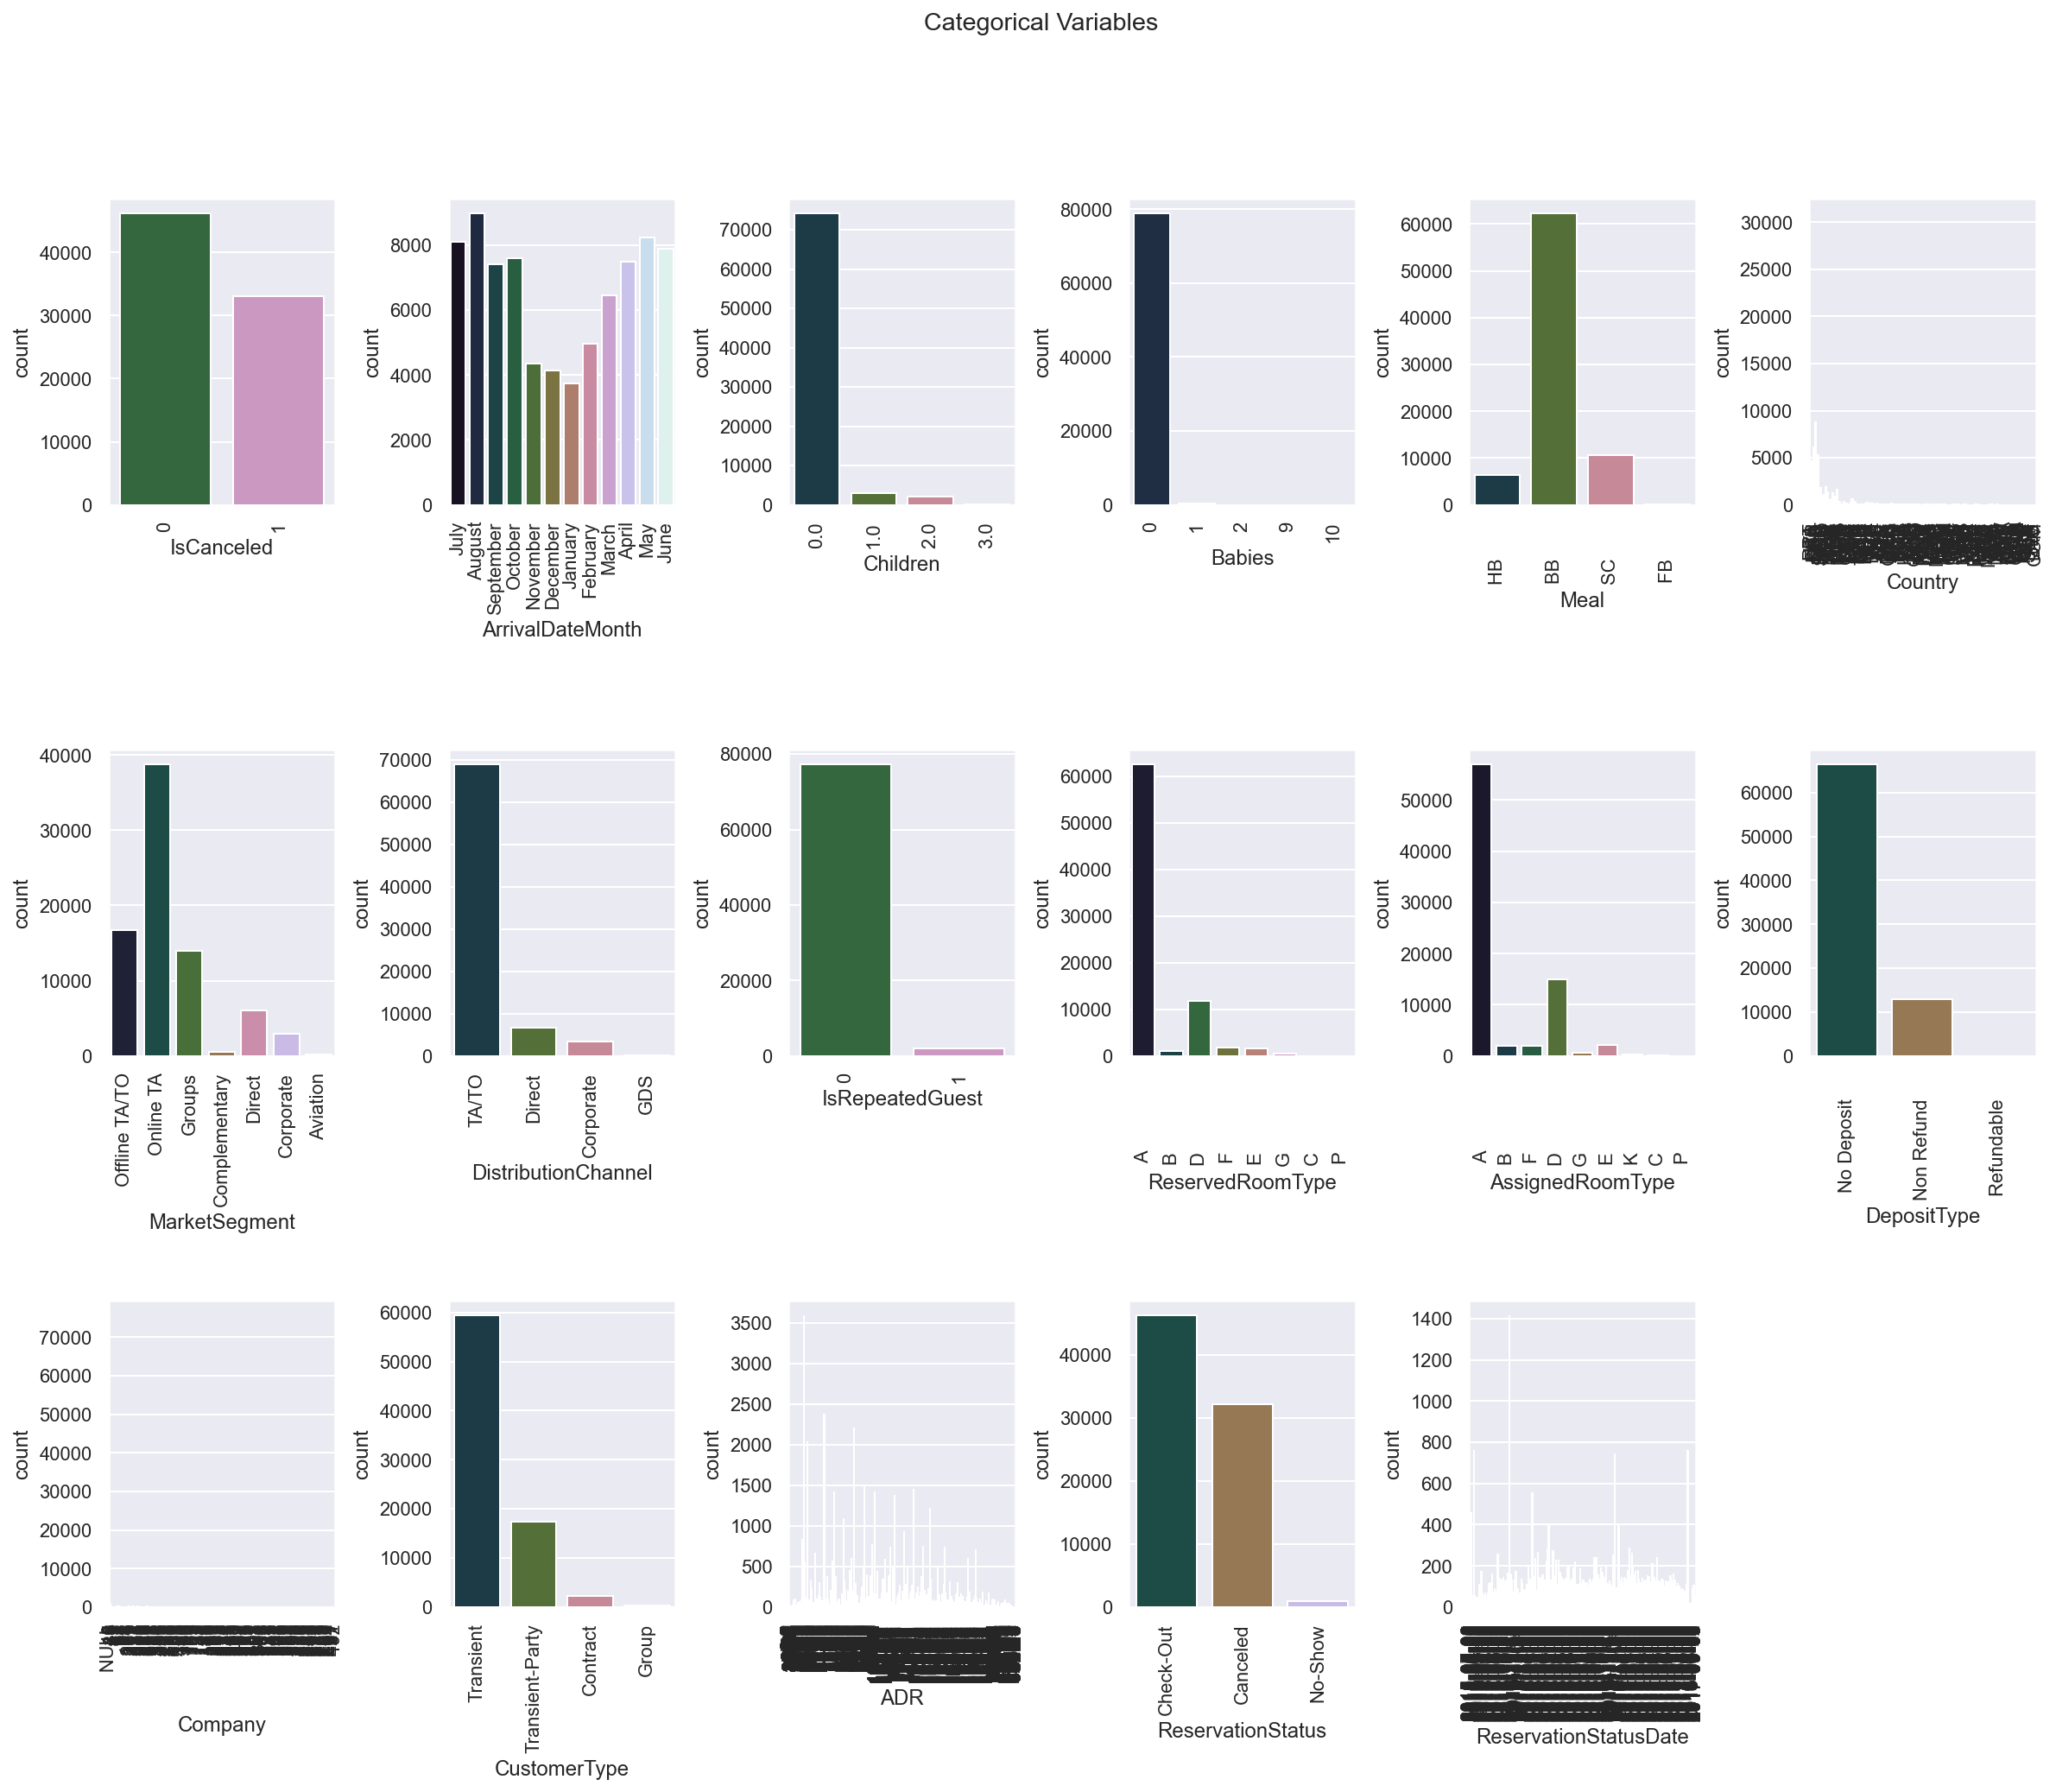

In [17]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features) / 3), figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features):
    g = sns.countplot(df1[feat], ax=ax, palette = 'cubehelix')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

title = "Categorical Variables"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

#Remove the last graphic
axes.flatten()[-1].remove()

plt.show()

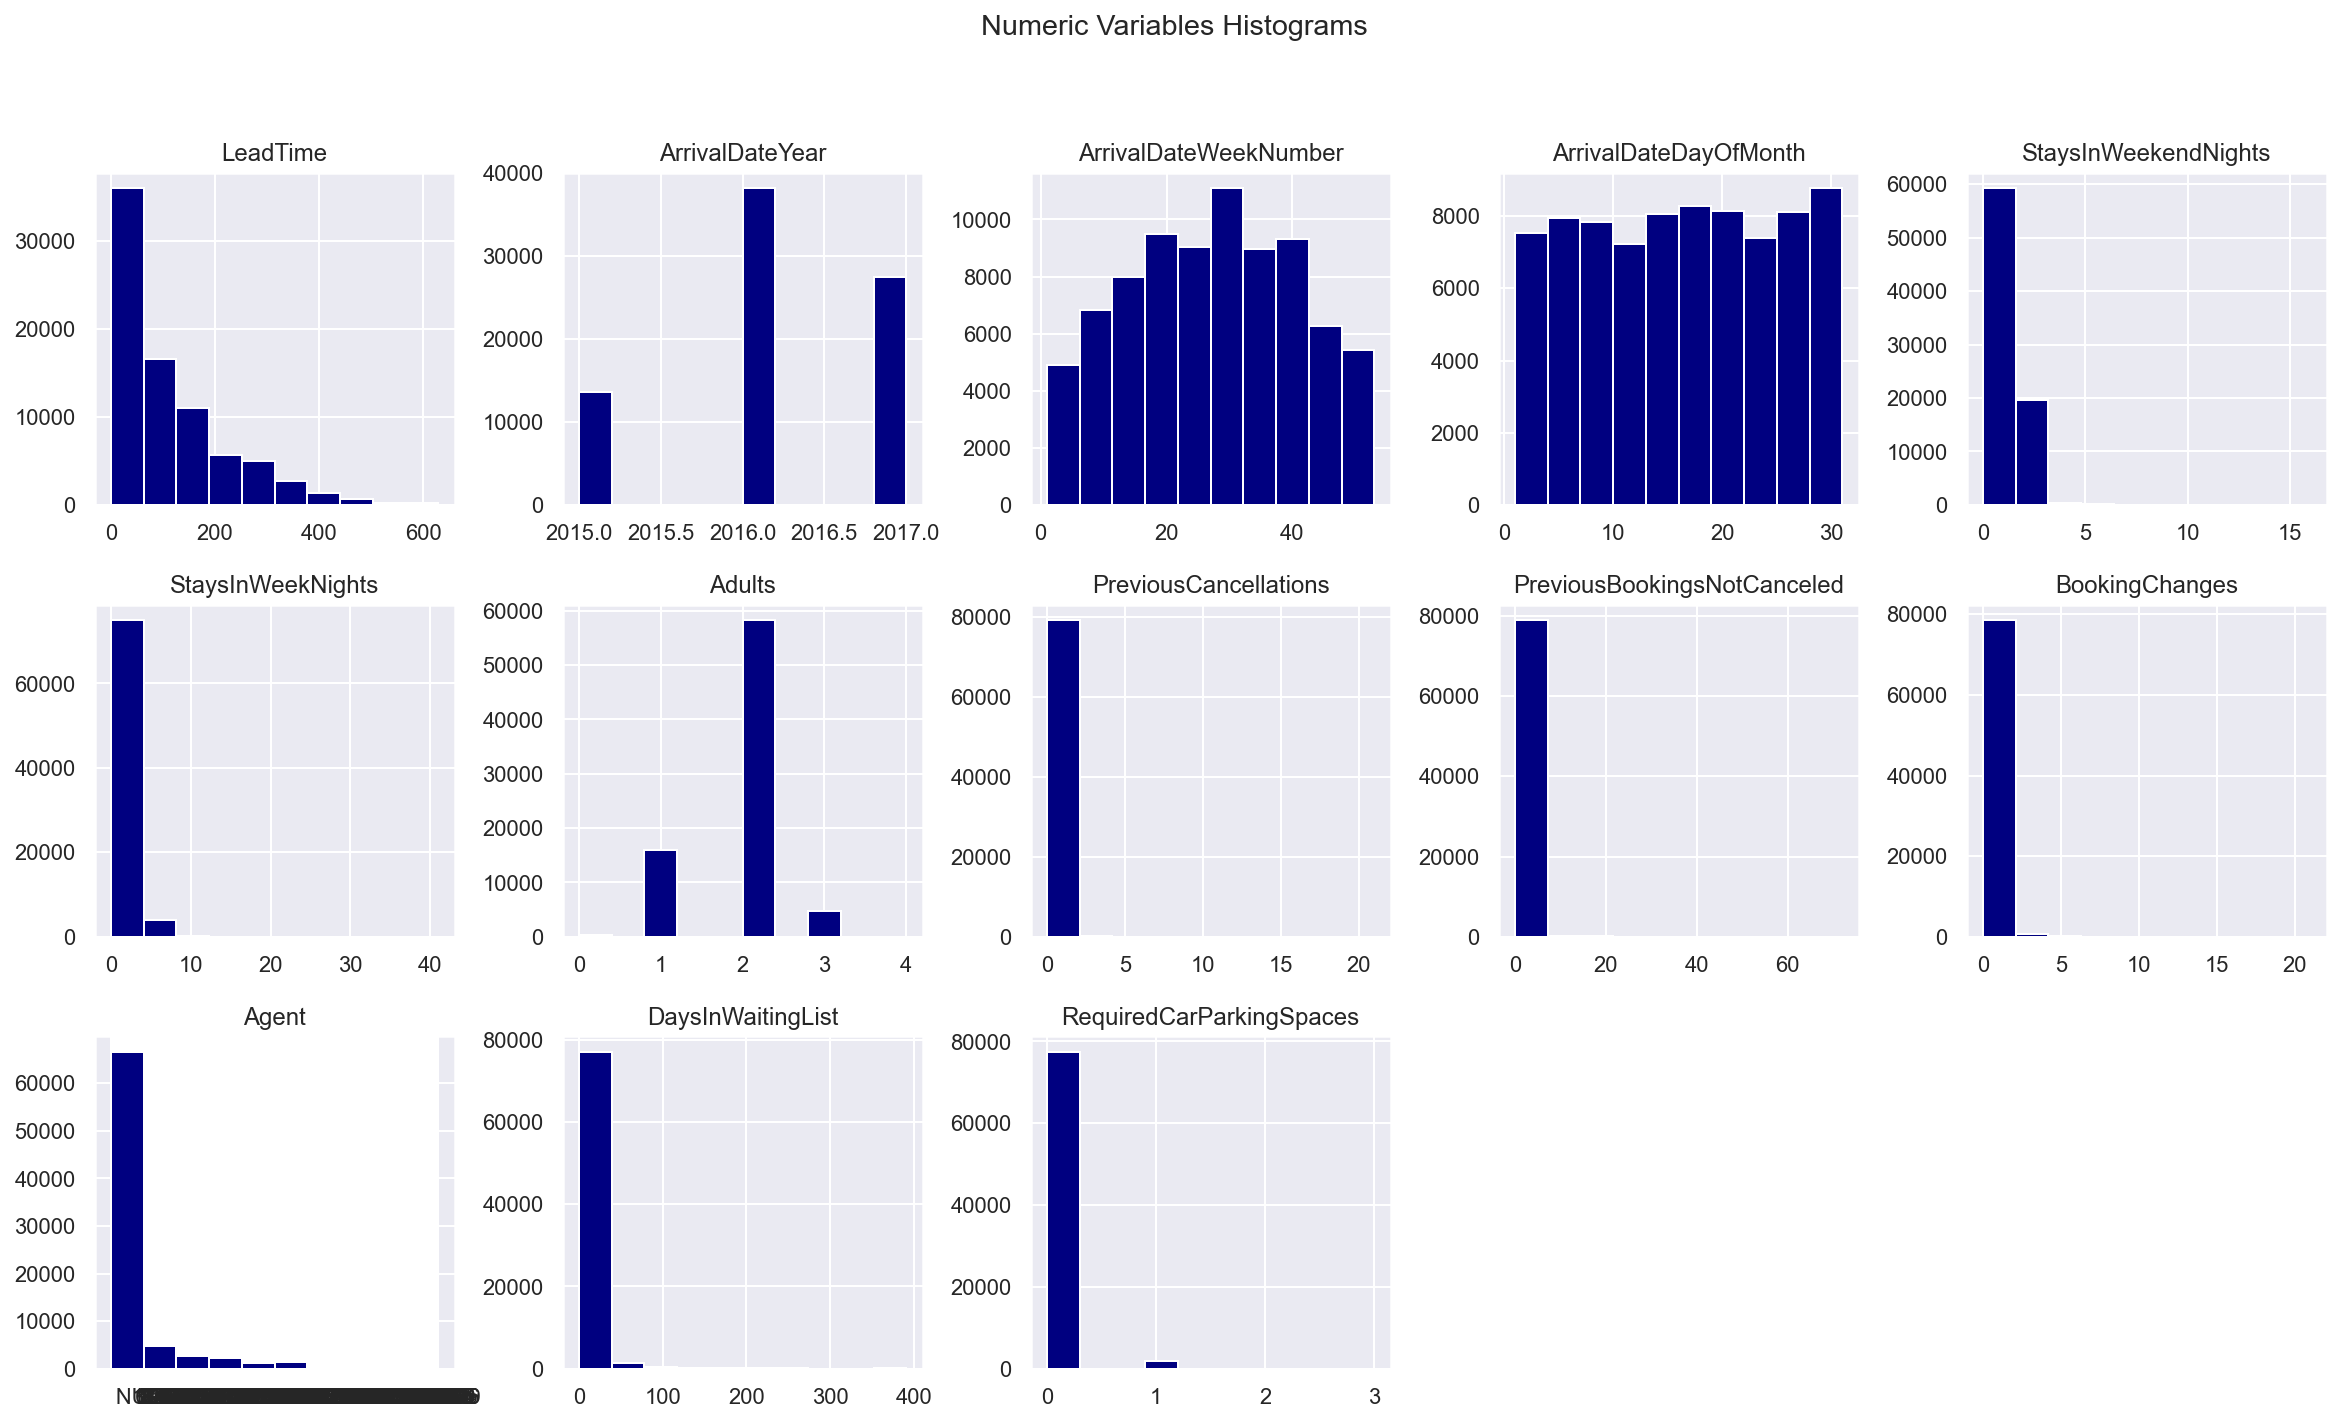

In [18]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df1[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)
#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#Remove the last 2 graphics
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()
plt.show()

C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DF010760\Anac

TypeError: Horizontal orientation requires numeric `x` variable.

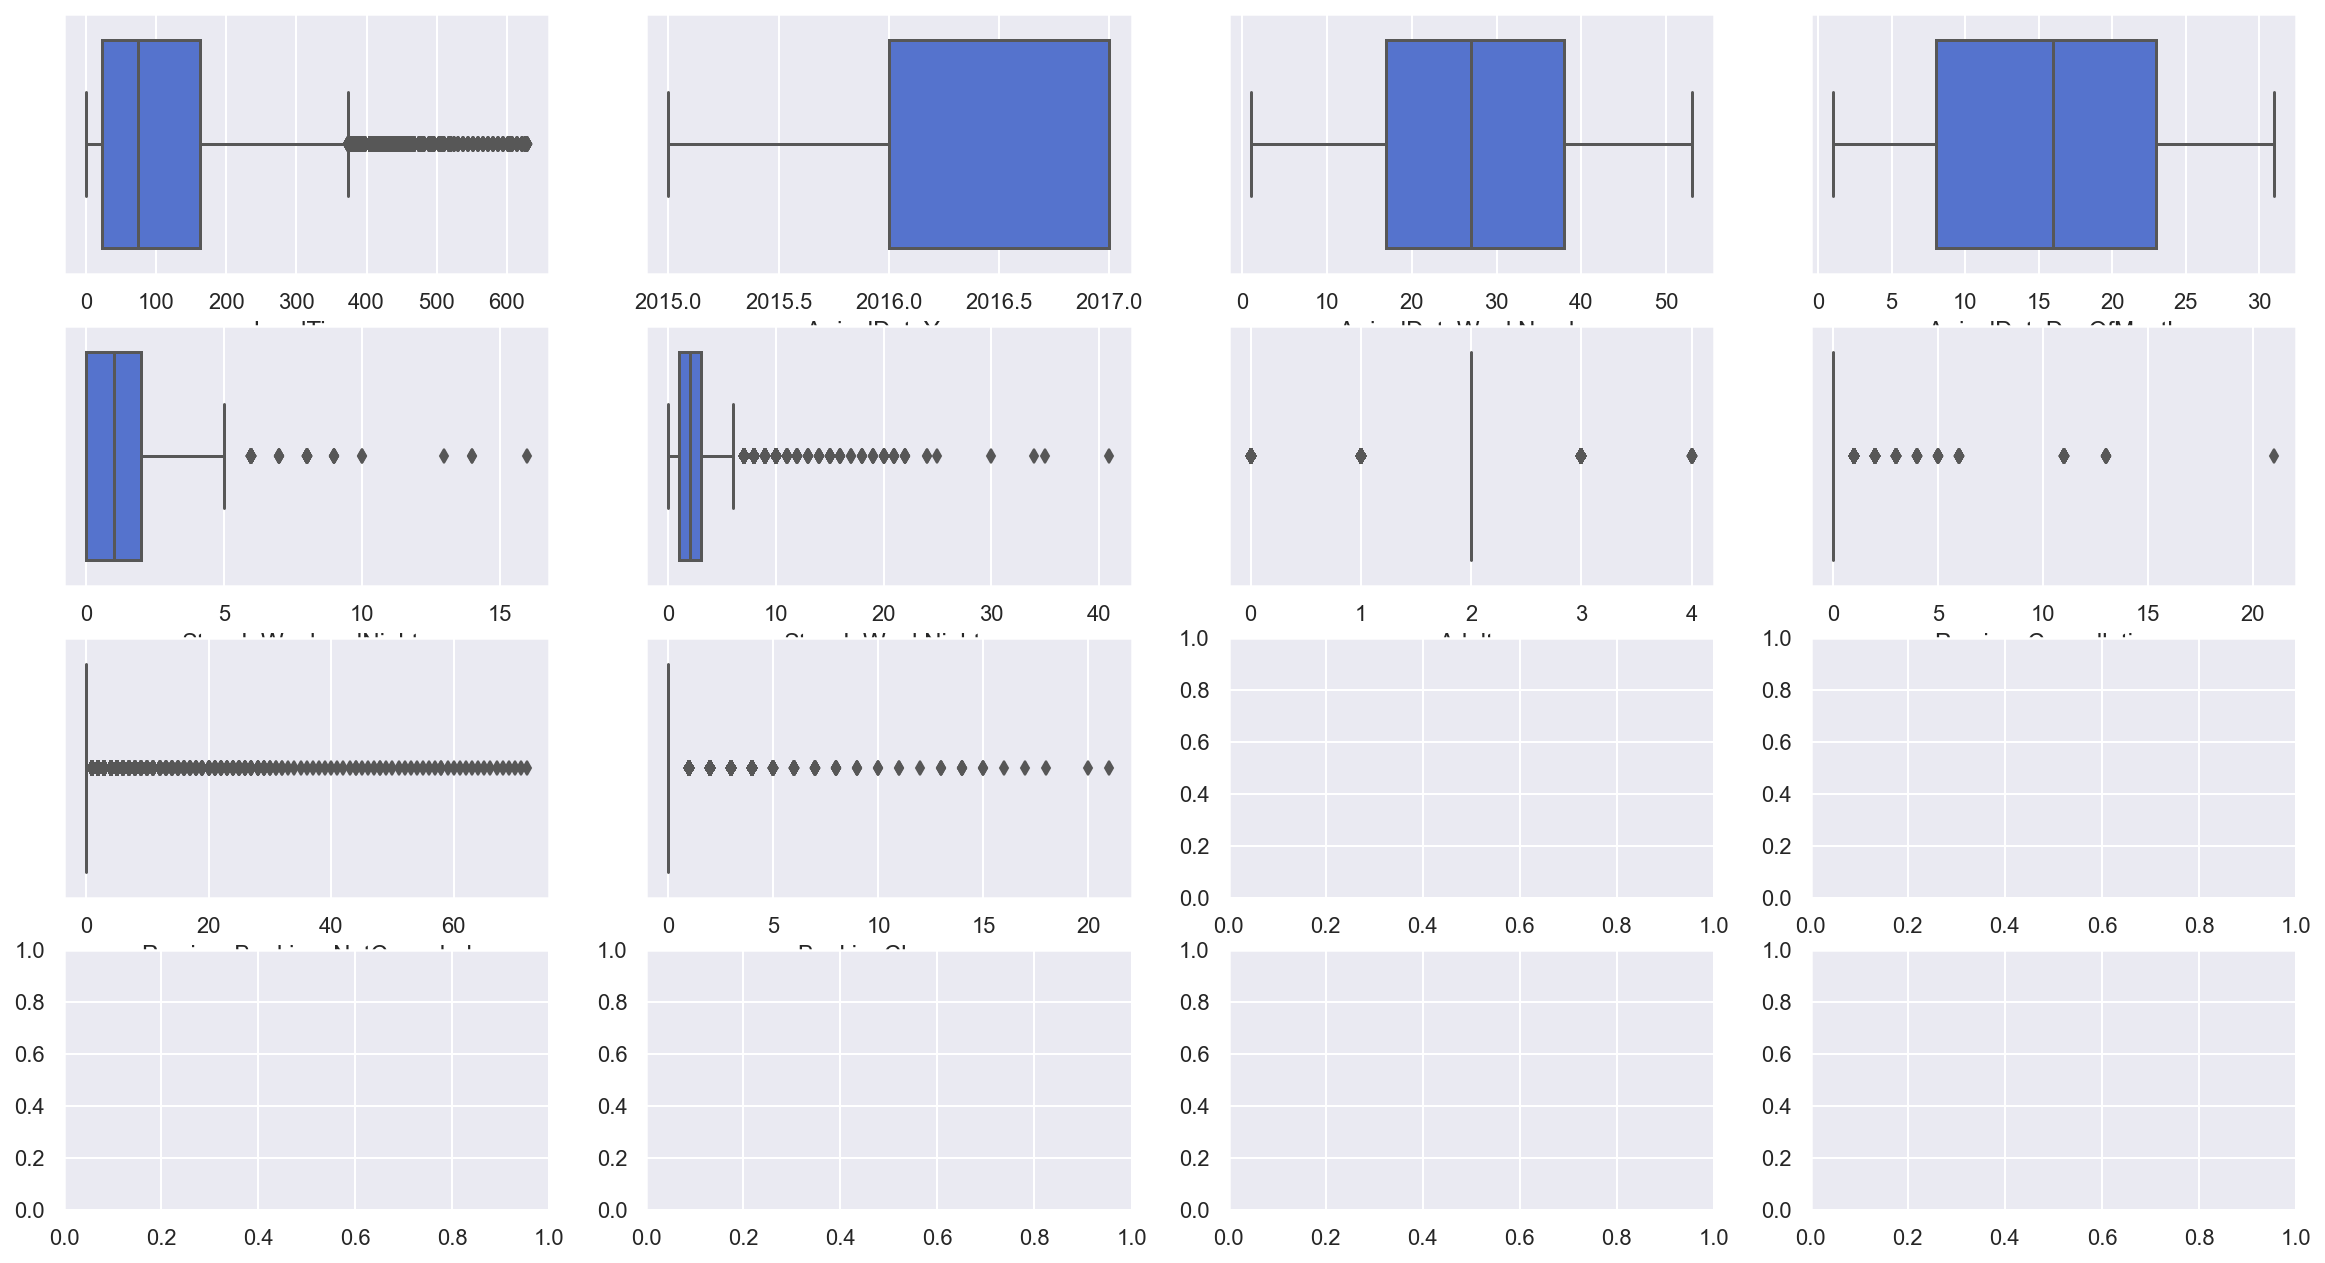

In [19]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) /4), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"
plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

# Show plots
plt.show()

In [19]:
#Create visualizations separated by categorical target (ONLY WORK FOR CLASSIFICATION PROBLEMS -target values 0 or 1)
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("y")

for feature in non_metric_features2:
    cont_tab = pd.crosstab(df1[feature], df1['y'], margins = True)
    categories = cont_tab.index[:-1]
    obs_pct = np.array([(np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values))*100, 
                        (np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values))*100])
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="royalblue")
    plt.legend((p2[0], p1[0]), ('1', '0'))
    plt.title(feature, size = 16)
    plt.xticks(rotation=65, size = 16,ha = 'right')
    plt.show()

ValueError: list.remove(x): x not in list

In [ ]:
#Create visualizations separated by categorical target (ONLY WORK FOR CLASSIFICATION PROBLEMS -target values 0 or 1)
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("y")

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features2) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), non_metric_features2):
    data = df1.groupby(['y'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='y', ax=ax, palette = "RdBu")

#Add a title to the plot
title = "Categorical Variables - Relative Frequencies by Target"
plt.suptitle(title)
#Adjust the rotation of xlabels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)

#Adjust the space between the plots
plt.subplots_adjust(wspace=0.3, hspace=0.7)

#Remove the last graphic
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()
plt.show()

In [ ]:
# All Numeric Variables Histograms separated by target
sns.set_style("white")
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df1[feat], hue=df1['y'], stat='density', common_norm=False, ax=ax, palette = "RdBu")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
#Adjust the space between plots
plt.subplots_adjust(wspace=0.4)

plt.show()

In [17]:
correlation = np.round(df1.corr(),2)
correlation

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
IsCanceled,1.00,0.31,-0.00,0.00,-0.00,-0.01,0.05,0.05,-0.03,-0.03,-0.07,0.17,-0.05,-0.15,0.06,-0.01,-0.13,-0.29
LeadTime,0.31,1.00,0.03,0.13,0.01,-0.02,0.06,0.12,-0.05,-0.03,-0.11,0.12,-0.07,-0.03,0.19,-0.14,-0.08,-0.13
ArrivalDateYear,-0.00,0.03,1.00,-0.54,-0.00,0.03,0.07,0.07,0.06,-0.01,-0.03,-0.20,0.02,0.03,-0.07,0.25,-0.00,0.14
ArrivalDateWeekNumber,0.00,0.13,-0.54,1.00,0.06,-0.00,-0.01,0.01,-0.00,0.01,0.00,0.04,-0.01,0.00,0.02,0.02,-0.00,0.02
ArrivalDateDayOfMonth,-0.00,0.01,-0.00,0.06,1.00,0.00,-0.01,-0.00,0.01,0.00,-0.01,-0.01,-0.00,0.01,0.02,0.02,0.00,-0.00
StaysInWeekendNights,-0.01,-0.02,0.03,-0.00,0.00,1.00,0.22,0.08,0.04,0.01,-0.08,-0.04,-0.03,0.05,-0.06,0.04,-0.02,0.07
StaysInWeekNights,0.05,0.06,0.07,-0.01,-0.01,0.22,1.00,0.09,0.04,0.01,-0.09,-0.05,-0.04,0.08,0.02,0.06,-0.04,0.06
Adults,0.05,0.12,0.07,0.01,-0.00,0.08,0.09,1.00,-0.01,0.01,-0.17,-0.04,-0.11,-0.09,-0.01,0.26,0.01,0.16
Children,-0.03,-0.05,0.06,-0.00,0.01,0.04,0.04,-0.01,1.00,0.02,-0.03,-0.04,-0.02,0.05,-0.04,0.31,0.05,0.11
Babies,-0.03,-0.03,-0.01,0.01,0.00,0.01,0.01,0.01,0.02,1.00,-0.00,-0.01,-0.00,0.07,-0.01,0.01,0.02,0.07


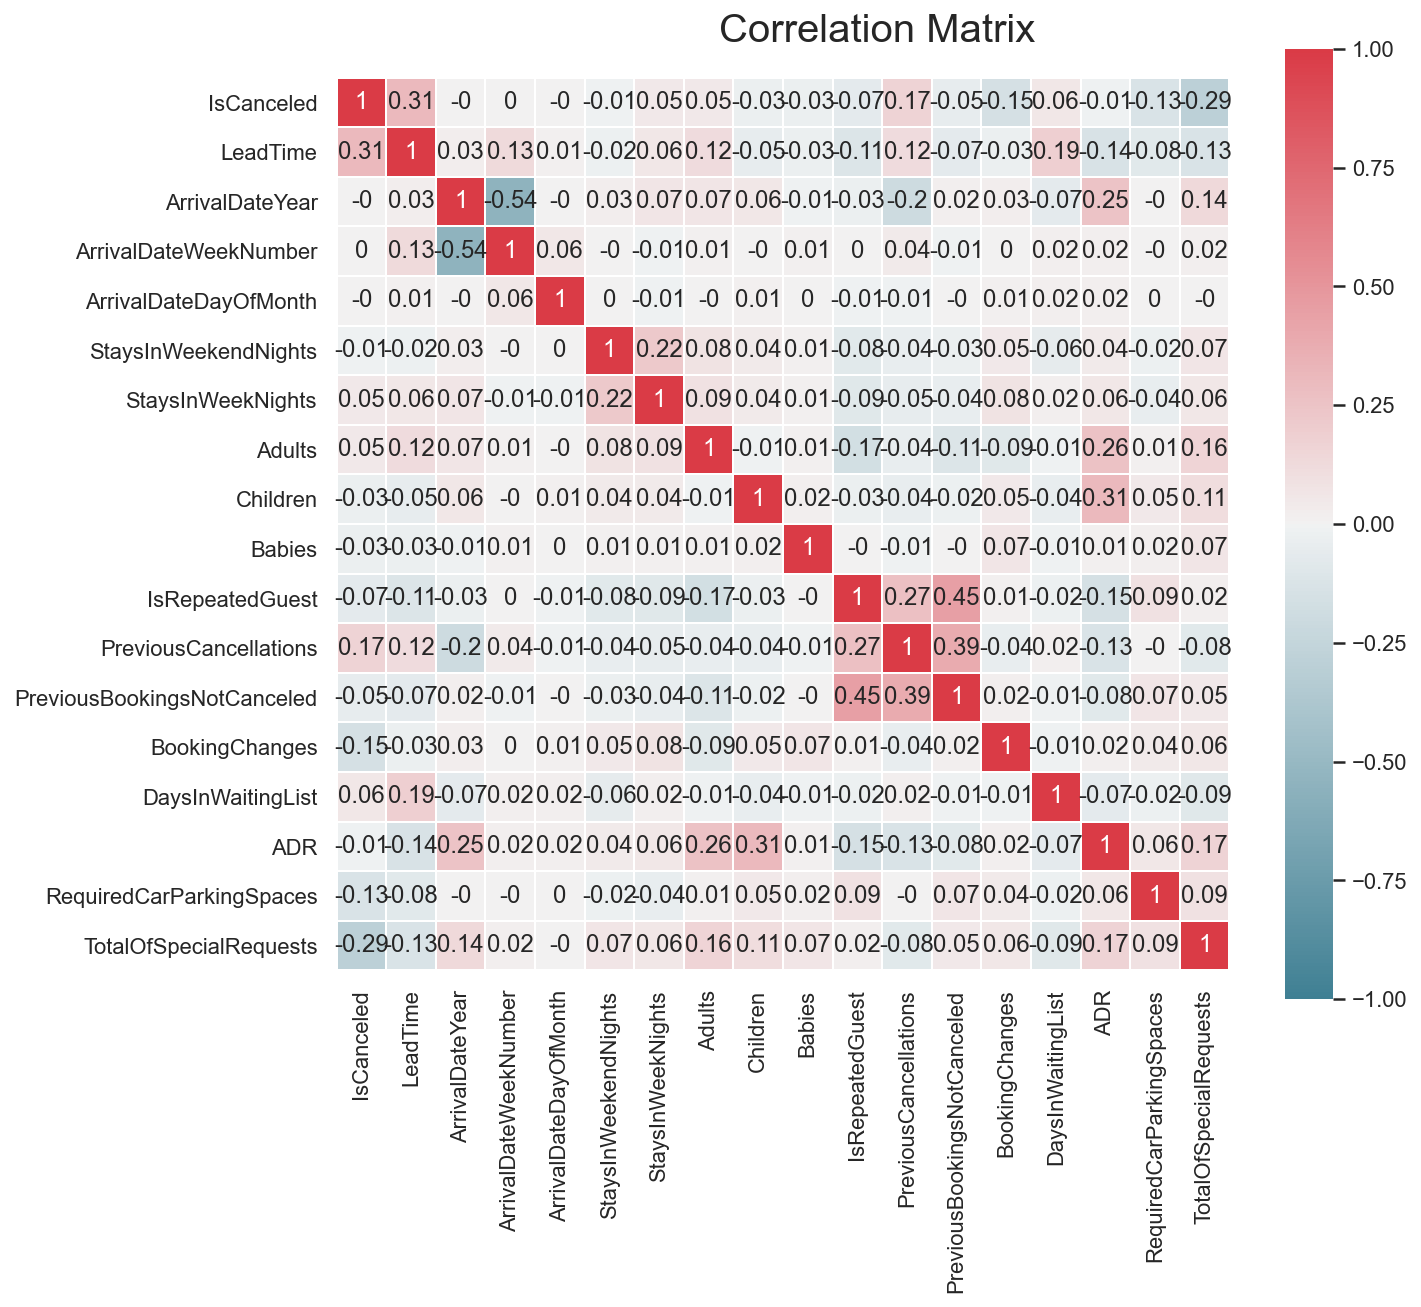

In [20]:
#Correlation matrix
fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot = correlation.values,cmap=sns.diverging_palette(220, 10, as_cmap=True), 
             vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [23]:
# Percentage of y='yes'(only for classification)
(df['y']=='yes').value_counts(normalize=True)

KeyError: 'y'

In [24]:
#Only for classification
sns.set_style('white')
sns.countplot(x='y',data= df1,palette = "Reds")

ValueError: Could not interpret input 'y'

## Data Preparation:

In [ ]:
#Set index
df1= df1.set_index('XX3')

### Clean data

In [ ]:
# Droping duplicated rows
df1.drop_duplicates(inplace=True)

In [23]:
# Droping irelevant columns
df1.drop(['contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
         'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)


In [24]:
#re-do non_metric and metric due to drop columns
non_metric_features = ['job','marital','education','default','housing','loan','poutcome','y']
metric_features = df1.columns.drop(non_metric_features).to_list()

In [27]:
df1.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,no


In [28]:
df1.info()

(41188, 12)

### Outlier Removal

In [29]:
#IQR Method
q25 = df1.quantile(.25)
q75 = df1.quantile(.75)
iqr = (q75 - q25)

 

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

 

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df1[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2,0))

print(filters2.value_counts())
print('Percentage of data kept after removing outliers:', filters2.value_counts()[1] / df1.shape[0], 4)

True     33002
False     8186
dtype: int64
Percentage of data kept after removing outliers: 0.8012527920753617 4


In [30]:
#hand made outliers

filters1 = (

    

    (df1['campaign']<=42)
    #&
    #(df1['cons.conf.idx']<=-29)

   
)
df2 = df1[filters1]
print('Percentage of data kept after removing outliers:', np.round(df2.shape[0] / df1.shape[0], 4))

Percentage of data kept after removing outliers: 0.9999


In [31]:
#Replace df1 by the method we decide
#IQR method
#df1 = df1[filters2]
#Hand made
df1 = df2.copy()

C:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\debor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\debor\anaconda3\lib\si

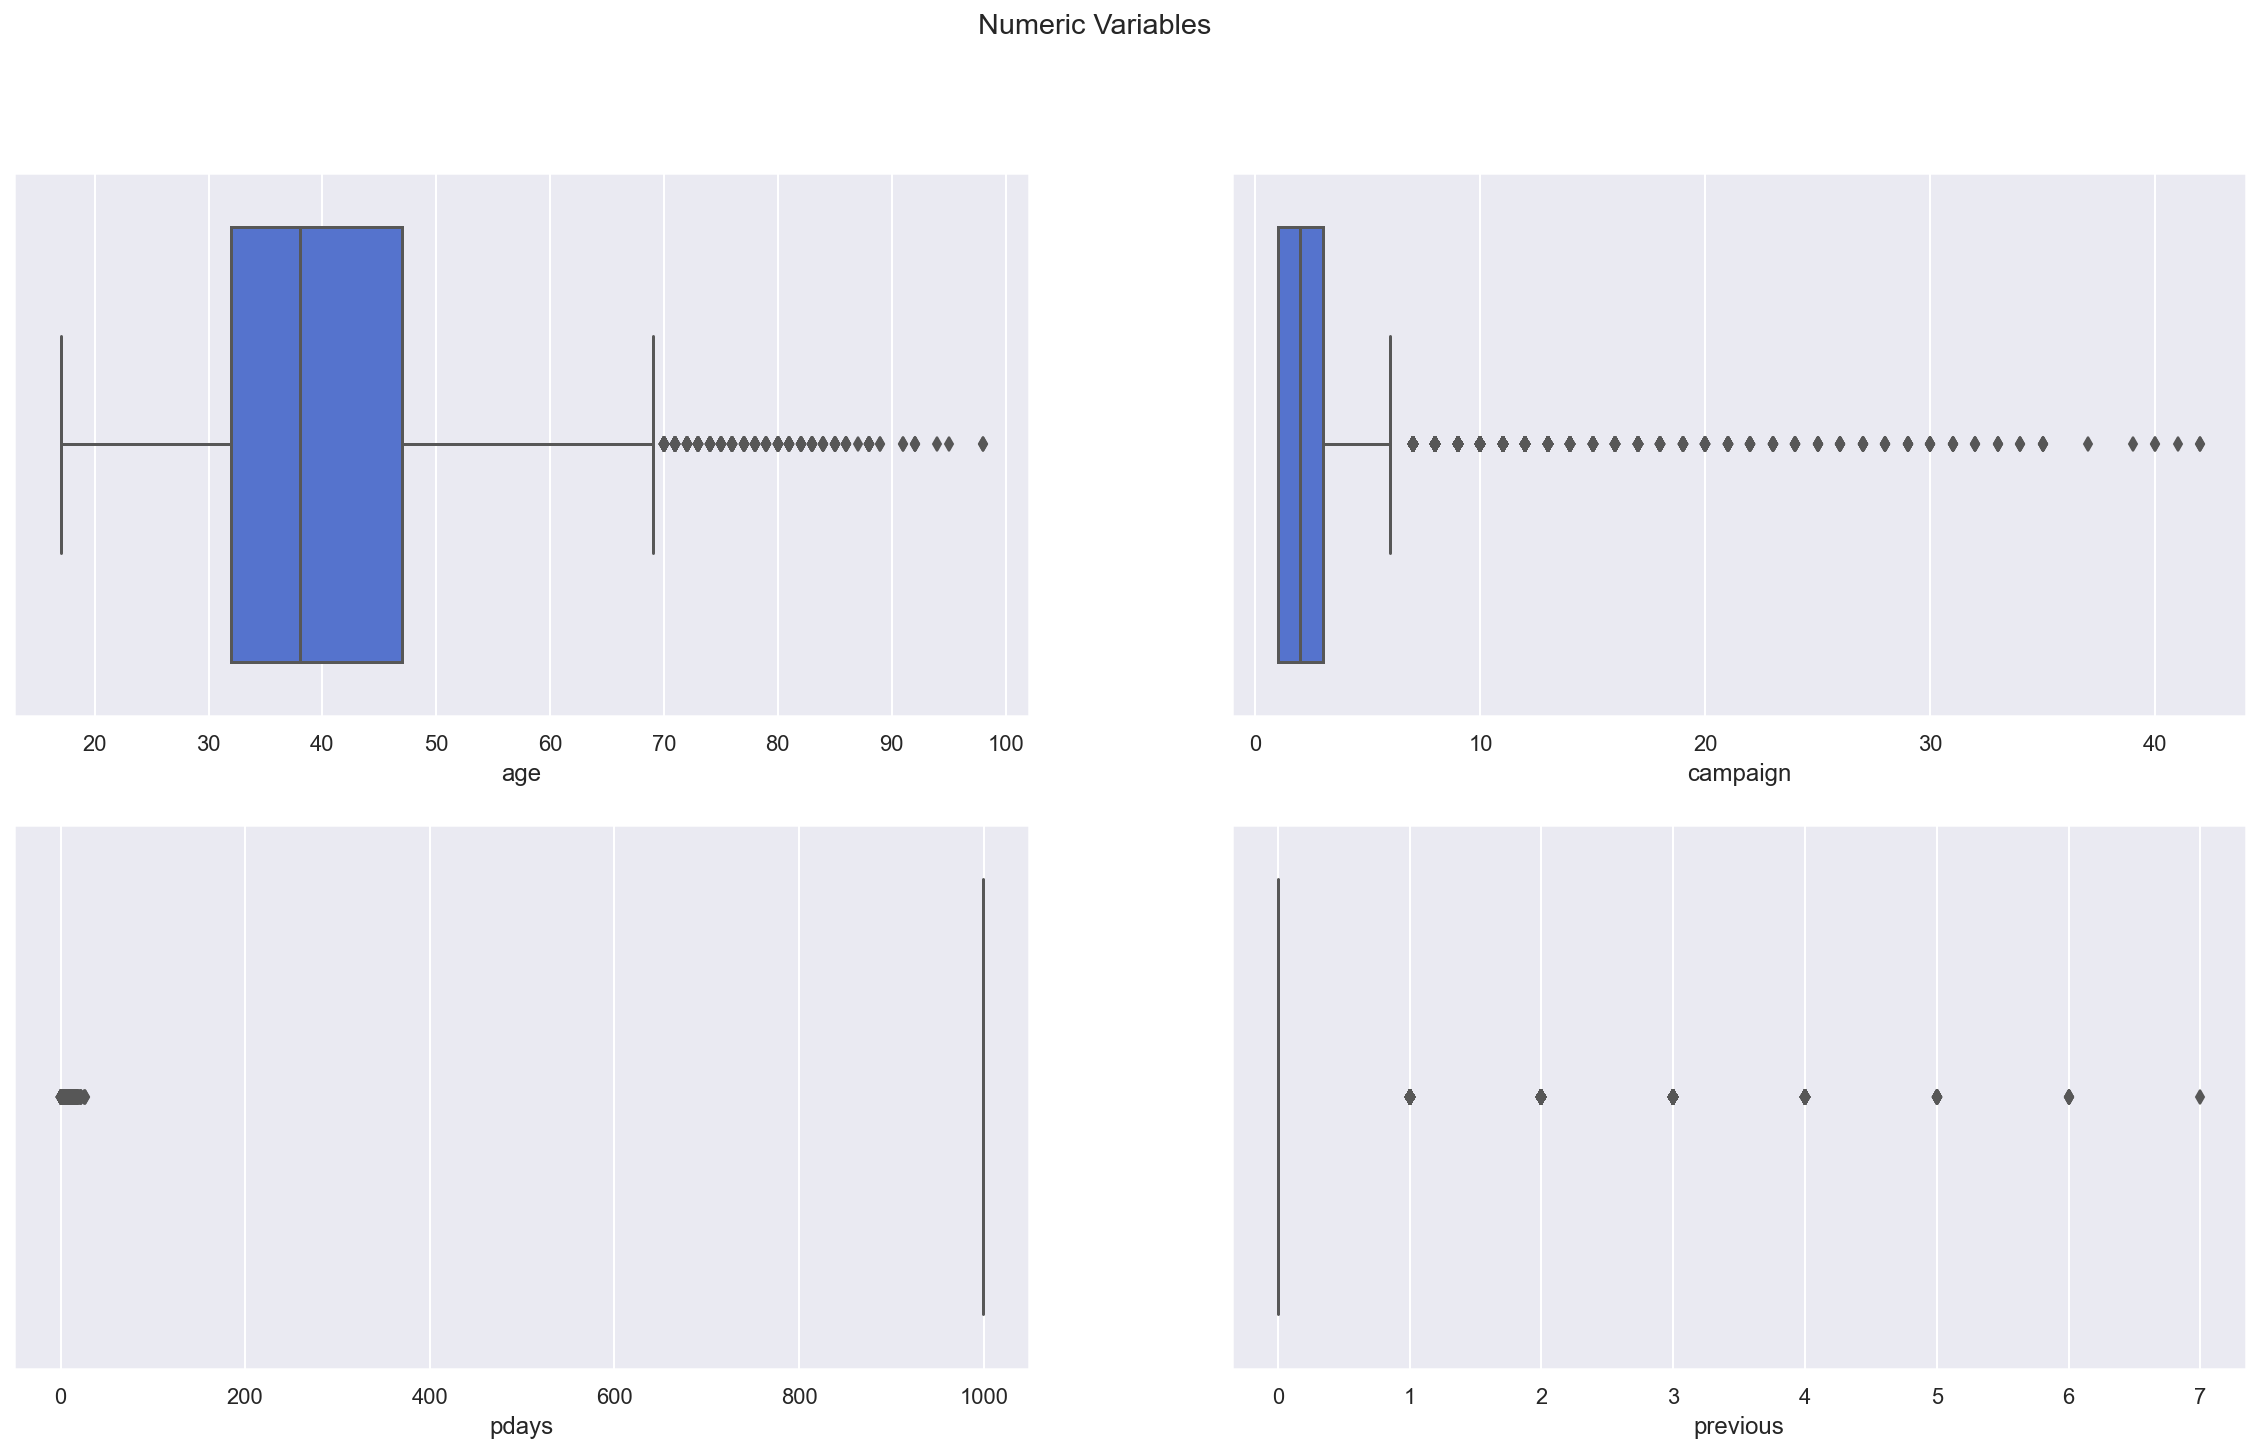

In [32]:
#Check boxplots after outliers removal
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables"

plt.suptitle(title)

plt.show()

### Missing values

In [33]:
df_missing = missing_data(df1)
df_missing = df_missing[df_missing['missing']>0]
df_missing

,Feature,missing,percentage


In [ ]:
#REPLACE MISSING VALUES BY THE MODE
df1.XXX = df1.XXX.fillna(df1.XXX.mode().loc[0])

In [35]:
df1.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,1,999,0,nonexistent,no


In [36]:
df1.shape

(41185, 12)

### Encoding categorical features

In [37]:
# One hot encode categorical features
ohc_features = non_metric_features.copy()
#Remove the target feature
ohc_features.remove('y')

ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(df1[ohc_features]),
                      index=df1.index,
                      columns=ohc.get_feature_names(ohc_features))

In [38]:
df1 = pd.concat([df1.loc[:, df1.columns.drop(ohc_features)], df_ohc], axis=1)

In [39]:
df1['y'] = df1['y'].replace('no',0)
df1['y'] = df1['y'].replace('yes',1)

In [40]:
df1.head(20)

,age,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,45,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,59,1,999,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,41,1,999,0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,24,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
9,25,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## PCA

In [ ]:
df_pca = df1.copy()
df_pca.shape

In [ ]:
#Standardize the data
features = df_pca.columns
#MinMax
#norm = MinMaxScaler().fit(df_pca)
#df-pca = norm.transform(df_pca)
#Standar scale
#sds = StandardScaler()
#scaled_feat = sds.fit_transform(df4[metric_features])
#df4[metric_features]= scaled_feat
#df4.head()
scale = StandardScaler().fit_transform(df_pca[features])
df_pca[features] = scale
#RobustScaler instanceand fit to your train data
#robust = RobustScaler().fit(df_pca)
#df_pca = robust.transform(df_pca)

In [ ]:
df_pca.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

In [ ]:
df_pca.head(20)

In [ ]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

In [ ]:
cov_matrix= df_pca.cov()
cov_matrix

In [ ]:
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix.index, 
             columns=cov_matrix.columns)

In [ ]:
pd.DataFrame(df_pca.values @ pca.components_.T, 
             index=df_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca_features = list(df_pca.columns)
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(df_pca[pca_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)
pca_df

In [ ]:
df_pca2 = pd.concat([df_pca, pca_df], axis=1)

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca2[pca_features + pca_feat_names].corr().loc[pca_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [ ]:
df_pca=df_pca.drop(pca_features,axis = 1)

In [ ]:
df1 = pd.concat([df_pca, pca_df], axis=1)

In [41]:
df1.head()

,age,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
df1.shape

(41185, 41)

In [43]:
#Concat all datas in one data set
df_preprocessed = df1.copy()

In [44]:
df_preprocessed.head()

,age,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,1,999,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56,1,999,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
df_preprocessed.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,age,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41185,41185,41185,41185,41185,41185,41185,41185,41185,41185,...,41185,41185,41185,41185,41185,41185,41185,41185,41185,41185
mean,40.0241,2.56433,962.473,0.172976,0.112662,0.253005,0.224693,0.0353527,0.0257375,0.0709967,...,7.28421e-05,0.452155,0.0240136,0.523831,0.824305,0.0240136,0.151681,0.103241,0.863421,0.0333374
std,10.4213,2.74314,186.917,0.494917,0.316183,0.434739,0.417385,0.184672,0.158353,0.256822,...,0.00853455,0.497712,0.153093,0.499438,0.380565,0.153093,0.358716,0.304278,0.343406,0.179518
min,17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,32,1,999,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
50%,38,2,999,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
75%,47,3,999,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
max,98,42,999,7,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [46]:
df_preprocessed.shape

(41185, 41)

In [47]:
#Export CSV to use in cluster file
df_preprocessed.to_csv(os.path.join("df_preprocessed.csv"), index=False)